In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Covid19-dataset/train'
valid_path = '/content/drive/MyDrive/Covid19-dataset/val'
test_path = '/content/drive/MyDrive/Covid19-dataset/test'

In [ ]:


resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:

for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Covid19-dataset/train/*')
print(len(folders))

3


In [ ]:

x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)


model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='nadam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

training_generator = ImageDataGenerator(
    rescale = 1. / 255,
    horizontal_flip = True,
    zoom_range = 0.2,
    shear_range = 0.2,

)
valid_generator=ImageDataGenerator(
    rescale = 1. / 255,
)



In [ ]:
training_set = training_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/train',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                          class_mode = 'categorical',
                                          )

Found 226 images belonging to 3 classes.


In [ ]:
training_set.class_indices

{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}

In [ ]:
valid_set = valid_generator.flow_from_directory('/content/drive/MyDrive/Covid19-dataset/val',
                                            target_size = (224, 224),
                                            batch_size = 15,
                                            class_mode = 'categorical',
                                            )

Found 25 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(valid_set)
)

Epoch 1/20
16/16 [==============================] - 58s 3s/step - loss: 4.4969 - accuracy: 0.3805 - val_loss: 2.1625 - val_accuracy: 0.6000
Epoch 2/20
16/16 [==============================] - 14s 907ms/step - loss: 2.1234 - accuracy: 0.5000 - val_loss: 5.0242 - val_accuracy: 0.6000
Epoch 3/20
16/16 [==============================] - 14s 893ms/step - loss: 2.3938 - accuracy: 0.5708 - val_loss: 0.8735 - val_accuracy: 0.6800
Epoch 4/20
16/16 [==============================] - 15s 913ms/step - loss: 1.5304 - accuracy: 0.6549 - val_loss: 1.0086 - val_accuracy: 0.8000
Epoch 5/20
16/16 [==============================] - 14s 887ms/step - loss: 2.8064 - accuracy: 0.6372 - val_loss: 3.9040 - val_accuracy: 0.6000
Epoch 6/20
16/16 [==============================] - 14s 871ms/step - loss: 1.5389 - accuracy: 0.6726 - val_loss: 1.8265 - val_accuracy: 0.5600
Epoch 7/20
16/16 [==============================] - 14s 894ms/step - loss: 3.6249 - accuracy: 0.5487 - val_loss: 2.0968 - val_accuracy: 0.5600
Ep

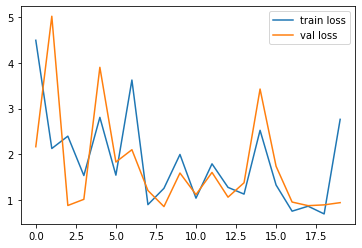

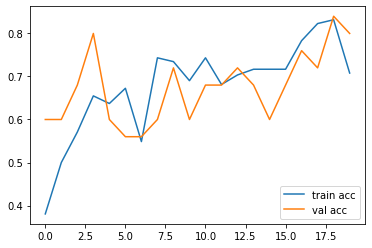

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from keras.models import load_model
img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/0104.jpeg',target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
classes=model.predict(img_data)
preds=np.argmax(classes, axis=1)

print(preds[0])

0


In [ ]:
y_actual=[]
y_test=[]

In [ ]:
import os

In [ ]:
from math import floor

In [ ]:
import os
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Normal/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Normal/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==1):
        y_test.append(1)
    else:
        y_test.append(0)
    
    y_actual.append(1)
    
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Covid/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Covid/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==0):
        y_test.append(0)
    else:
        y_test.append(1)
        
    y_actual.append(0)
    
    
    

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/"):
    img=image.load_img('/content/drive/MyDrive/Covid19-dataset/test/Viral Pneumonia/'+i,target_size=(224,224))
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    img_data=preprocess_input(x)
    Hero=model.predict(img_data)
    predicted=np.argmax(Hero, axis=1)
    if(predicted[0]==2):
        y_test.append(2)
    else:
        y_test.append(0)
        
    y_actual.append(2)

In [ ]:
y_actual=np.array(y_actual)
y_test=np.array(y_test)

In [ ]:
print(y_actual)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
print(y_test)

[0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]


[[ 3 23  0]
 [11  9  0]
 [18  0  2]]


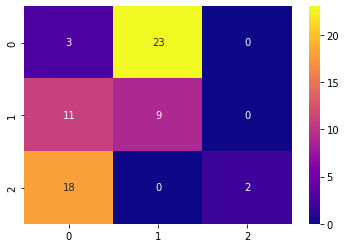

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_actual,y_test)
import seaborn as sns
sns.heatmap(cm,cmap="plasma",annot=True)
print(cm)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_actual,y_test,digits=3))

              precision    recall  f1-score   support

           0      0.094     0.115     0.103        26
           1      0.281     0.450     0.346        20
           2      1.000     0.100     0.182        20

    accuracy                          0.212        66
   macro avg      0.458     0.222     0.210        66
weighted avg      0.425     0.212     0.201        66



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_test)

0.21212121212121213